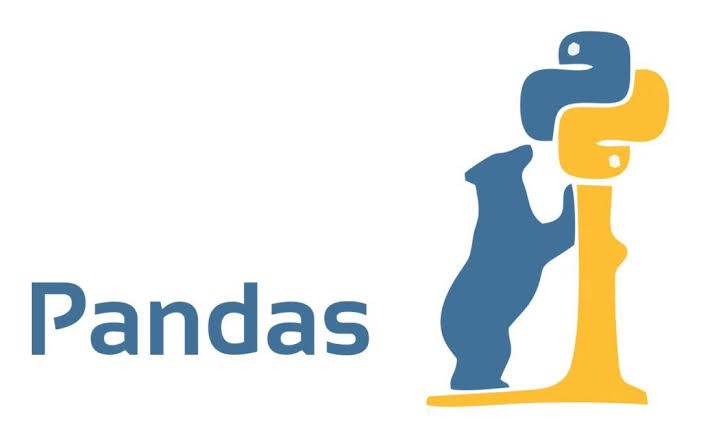

# 데이터프레임 병합
---

데이터 전처리 작업을 진행하다보면 데이터프레임을 여러개로 나누고 또다시 하나로 합치는 등의 경우가 발생한다. 이번 포스팅은 이러한 경우 사용할 수 있는 데이터프레임 병합 메소드에 대해서 다루어보자.

# pd.concat()
---

concat이라는 함수명에서도 알 수 있듯이 concat 함수는 데이터프레임을 연결시켜주는 함수이다.

먼저 병합을 위한 데이터프레임을 두개 생성해보자

In [5]:
import pandas as pd

df1 = pd.DataFrame({'a':['a0','a1','a2','a3'],
                   'b':['b0','b1','b2','b3'],
                   'c':['c0','c1','c2','c3']},
                  index = [0,1,2,3])

df2 = pd.DataFrame({'a':['a2','a3','a4','a5'],
                   'b':['b2','b3','b4','b5'],
                   'c':['c2','c3','c4','c5'],
                   'd':['d2','d3','d4','d5']},
                   index = [2,3,4,5])

print(df1,'\n\n', df2)

    a   b   c
0  a0  b0  c0
1  a1  b1  c1
2  a2  b2  c2
3  a3  b3  c3 

     a   b   c   d
2  a2  b2  c2  d2
3  a3  b3  c3  d3
4  a4  b4  c4  d4
5  a5  b5  c5  d5


위의 두 데이터프레임을 살펴보면 행 index명과 컬럼명이 다르다. 이대로 pd.concat() 함수를 사용하면 어떻게 되는지 살펴보자.

**pd.concat() 에 들어가는 인자값으로는 리스트를 받는다는 점을 기억하자**

In [8]:
pd.concat([df1, df2]) # axis=0 디폴트

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


아무런 옵션 없이 행 인덱스와 열 인덱스가 서로 다른 두 데이터프레임을 병합하는 경우 위와 같이 병합되기 전 자신의 인덱스를 그대로 사용하고 열 인덱스가 맞지 않는 부분은 NaN 값으로 채워진다.

이 때 행 인덱스를 재배열하기 위한 옵션으로 `ignore_index=True`를 지정할 수 있다.

In [13]:
result = pd.concat([df1, df2], ignore_index=True)
result

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
4,a2,b2,c2,d2
5,a3,b3,c3,d3
6,a4,b4,c4,d4
7,a5,b5,c5,d5


null값은 fillna 메소드를 통해 처리 가능하다.

In [14]:
result.fillna(0)

,a,b,c,d
0,a0,b0,c0,0
1,a1,b1,c1,0
2,a2,b2,c2,0
3,a3,b3,c3,0
4,a2,b2,c2,d2
5,a3,b3,c3,d3
6,a4,b4,c4,d4
7,a5,b5,c5,d5


ignore_index 외에도 다양한 옵션을 제공하는데 다음의 링크에서 Pandas 공식문서를 확인할 수 있다.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

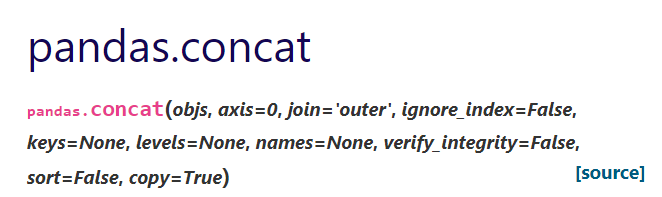

이번에는 axis=1로 지정해서 열방향으로 두 데이터프레임을 병합해보자. 사실상 데이터프레임을 가로로 붙이는 경우는 거의 없기 때문에 디폴트 값은 행방향을 갖는다.

In [15]:
pd.concat([df1, df2], axis=1)

,a,b,c,a,b,c,d
0,a0,b0,c0,NaN,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN,NaN
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3
4,NaN,NaN,NaN,a4,b4,c4,d4
5,NaN,NaN,NaN,a5,b5,c5,d5


열방향으로 axis를 지정하고 두 데이터프레임을 병합한 결과 행 인덱스와 열 인덱스가 맞지 않는 부분에 대해서 null 값을 반환한다.

만약 두 null값을 제외한 교집합을 만들고 싶다면 join 옵션을 inner로 지정한다.

In [17]:
pd.concat([df1, df2], axis=1, join='inner')

,a,b,c,a,b,c,d
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3


pd.concat 함수의 join 옵션은 디폴트로 outer join을 수행한다. 따라서 위와 같이 null 값이 반환되었던 것이고 inner join을 수행하면 null값을 제외한 교집합만을 반환한다.

# Series 데이터와 DataFrame의 병합
---

Pandas의 DataFrame의 Series의 집합이다. 따라서 Series를 DataFrame에 병합하는 것 또한 가능한데 이 때 Sereis는 하나의 컬럼이라고 이해하면 된다.

아래의 예시는 s1이라는 열 인덱스(컬럼명)을 가진 Sereis 객체를 df1에 병합하는 예시이다.

In [20]:
s1 = pd.Series(['s0', 's1', 's2', 's4'], name='s1')

pd.concat([df1, s1], axis=1) # 결과적으로 컬럼을 붙이는 것이기 때문에 axis=1로 지정

,a,b,c,s1
0,a0,b0,c0,s0
1,a1,b1,c1,s1
2,a2,b2,c2,s2
3,a3,b3,c3,s4


# Series간의 병합
----

pd.concat 함수를 이용해 Series간의 병합 또한 가능하다.

In [27]:
s1 = pd.Series(['a0', 'b1', 'c2', 'd4'], name='s1')
s2 = pd.Series(['e0', 'f1', 'g2', 'h4'], name='s2')

print(pd.concat([s1, s2], axis=0, ignore_index=True))
print('\n\n')
print(pd.concat([s1, s2], axis=1))

0    a0
1    b1
2    c2
3    d4
4    e0
5    f1
6    g2
7    h4
dtype: object



   s1  s2
0  a0  e0
1  b1  f1
2  c2  g2
3  d4  h4


앞의 Series의 병합에 대해 살펴보았듯이 사실상 Series의 병합은 추가의 개념에 더 가깝다고 볼 수 있다.

# pd.merge()
---

`merge()` 함수는 두 데이터프레임을 병합하는 기능을 수행한다는 점에서 `pd.concat()`함수와 동일하다.

하지만 merge() 함수는 병합하고자 하는 두 데이터프레임의 고유값(key)를 기준으로 병합하 때 사용한다는 점에서 차이가 있다.

In [39]:
df1 = pd.DataFrame({
    'data1':range(6),
    'key':list('aabbcc')
})

df2 = pd.DataFrame({
    'data2':range(3),
    'key':list('cad')
})

print(df1, '\n\n', df2)

   data1 key
0      0   a
1      1   a
2      2   b
3      3   b
4      4   c
5      5   c 

    data2 key
0      0   c
1      1   a
2      2   d


먼저 두 데이터프레임의 구성부터 살펴보자 df1은 6개의 행을 가지고 있고 중복되는 key 컬럼의 값들을 가지고 있다.

그리고 df2는 3개의 행과 고유한 key 컬럼의 값들을 가지고 있다.

pd.merge() 함수는 두 데이터프레임에 존재하는 고유값을 기준으로 병합한다고 설명했다. 이 경우 두 데이터프레임에서 공통적으로 가지고 있는 고유한 키 값은 key 컬럼의 값들이 된다.

먼저 아무런 옵션을 지정하지 않고 merge 함수를 사용해보자.

`merge 함수의 디폴트 옵션은 공통 열이름을 기준으로 inner join을 수행한다.`

## merge(how='inner')

In [40]:
pd.merge(df1, df2)

,data1,key,data2
0,0,a,1
1,1,a,1
2,4,c,0
3,5,c,0


위의 결과를 확인하면 inner join으로 공통된 열 이름(key)을 기준으로 data2의 값들이 중복되서 합쳐지고 공통되지 않는 key값 d에 대해선 공통되는 값이 없어 생략된다.

이번에는 merge 함수에 outer join을 수행해보자

## merge(how='outer')

In [41]:
pd.merge(df1, df2, on='key', how='outer')

,data1,key,data2
0,0.0,a,1.0
1,1.0,a,1.0
2,2.0,b,NaN
3,3.0,b,NaN
4,4.0,c,0.0
5,5.0,c,0.0
6,NaN,d,2.0


outer join을 수행하면 공통되지 않는 값들에 대해 NaN 값을 반환한다.

## merge(how='left')

In [43]:
pd.merge(df1, df2, on='key', how='left')

,data1,key,data2
0,0,a,1.0
1,1,a,1.0
2,2,b,NaN
3,3,b,NaN
4,4,c,0.0
5,5,c,0.0


left join을 수행하면 df1를 기준으로 join을 수행하여 df2에 해당 key 값이 없는 경우NaN 값을 반환한다.

## merge(how='right')

In [44]:
pd.merge(df1, df2, on='key', how='right')

,data1,key,data2
0,4.0,c,0
1,5.0,c,0
2,0.0,a,1
3,1.0,a,1
4,NaN,d,2


right join을 수행하면 left join과 반대로 df1에 해당 key 값이 없는 경우 NaN값을 반환한다.

## left_on & right_on

how 옵션을 이용해 여러 join을 이용할 수 있는데 추가적으로 left_on과 right_on 옵션을 이용해서 왼쪽 DF의 키값과 오른쪽 DF의 키값이 같은 것들 끼리 m * n 조합으로 데이터프레임 병합이 가능하다.

예시를 통해 어떻게 데이터프레임 병합이 가능한지 알아보자

In [46]:
df1 = pd.DataFrame({
    'data1' : range(7),
    'lkey' : list('abcabca')
})

df2 = pd.DataFrame({
    'data2' : range(3),
    'rkey' : list('abd')
})

In [47]:
pd.merge(df1, df2, left_on='lkey', right_on='rkey')

,data1,lkey,data2,rkey
0,0,a,0,a
1,3,a,0,a
2,6,a,0,a
3,1,b,1,b
4,4,b,1,b


위 결과를 확인해보면 두 데이터프레임의 key 값이 같지 않지만 left_on과 right_on 옵션을 이용해 key 값을 지정한 것을 확인할 수 잇다. 추가적으로 merge 함수의 how 옵션은 inner join이 디폴트이기 때문에 위와 같은 결과가 반환된것이다.

# join()
---

join 함수는 merge() 함수를 기반으로 만들어졌으며 작동방식이 비슷하지만 행 인덱스를 기준으로 데이터프레임을 병합한다는 점에서 차이가 있다.

In [54]:
df1 = pd.DataFrame({
    'data1' : range(7),
    'lkey' : list('abcabca'),
}, index = range(7))

df2 = pd.DataFrame({
    'data2' : range(3),
    'rkey' : list('abd')
}, index = [2, 3, 4])

In [55]:
df1.join(df2)

,data1,lkey,data2,rkey
0,0,a,NaN,NaN
1,1,b,NaN,NaN
2,2,c,0.0,a
3,3,a,1.0,b
4,4,b,2.0,d
5,5,c,NaN,NaN
6,6,a,NaN,NaN


join 함수는 디폴트값으로 left join을 수행하기 때문에 위와 같은 결과를 확인할 수 있다.

병합 기준 역시 행 인덱스를 기반으로 병합이 수행되었다.